# Import and Check Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('/Users/alexlei/Documents/customer_sensitivity.csv')
pd.set_option('display.max_columns', None)
customer_df.head()

/var/folders/29/dmw7b_6j5w999w4qp0m3znym0000gp/T/ipykernel_50942/1967686817.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv('/Users/alexlei/Documents/customer_sensitivity.csv')


,SUBMISSION_UUID,CUSTOMER_SENSITIVITY_TARGET,SUBMISSION_DATE,DEAL_TYPE,PROGRAM,IS_PRIME_DEAL,SUBMISSION_CATEGORY,STAGE_NAME,SUB_STAGE,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,AMOUNT_ACCEPTED_OFFER,STIP_COUNT,STIPULATIONS,DATE_APPROVED,AVERAGE_TRUE_REVENUE,IS_PREVIOUSLY_FUNDED_CUSTOMER,APBUS_YRS_IN_BUSINESS,APBUS_ENTITY_TYPE,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,PNSCO_PAYNET_SCORE,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENSCO_SCORE_FICO_MAX,ENSCO_SCORE_VANTAGE_MAX,ENSCO_SCORE_BANKRUPTCY_MAX,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_VERSION,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,FIRST_DECISION,POSITIONS,ISO_COMPETING_SUB,FIRST_PARTNER_NAME
0,5affeba1-c9d2-4c32-b515-b27c499c2e9f,False,2025-03-11 15:09:12.067,New Deal,Premium,True,new_sales,Closed Lost,Deal Lost,350000.0,18.0,1.33,0.15,NaN,2.0,"""12 Month Bank Verification, Tax Return""",2025-03-12 08:58:35.472,435446.52,False,31.88,Limited Liability Company (LLC),4.0,0.0,0.4483,0.333,0.0000,674.0,36.0,MEDIUM-HIGH RISK,11.0,13.0,28.0,640.0,672.0,64.0,2.0,34.08,1.0,6.1.2,1.0000,20.0,2025-03-12 08:58:57.000,0.0,NaN,Lending Tree
1,b19dd23b-38c5-41cd-b51a-796782894131,True,2025-03-11 15:13:39.670,New Deal,Core,False,new_sales,Funded,NaN,25000.0,6.0,1.38,0.15,25000.0,NaN,NaN,2025-03-18 17:44:26.207,47502.67,False,1.32,Limited Liability Company (LLC),8.0,0.0,0.2994,0.333,0.0000,NaN,6.0,HIGH RISK,89.0,80.0,25.0,750.0,712.0,270.0,0.0,1.42,0.0,6.1.2,0.7753,5.0,2025-03-11 17:36:41.000,0.0,NaN,Lendio
2,a8e3a848-9a0d-4b75-ac1a-7d60610e7edf,False,2025-03-11 14:12:17.801,New Deal,Premium,False,new_sales,Closed Lost,Deal Lost,150000.0,10.0,1.29,0.15,NaN,NaN,NaN,2025-03-11 17:00:38.292,472645.69,False,12.16,Corporation,9.0,0.0,0.2197,0.333,0.0500,690.0,82.0,LOW-MEDIUM RISK,74.0,87.0,44.0,746.0,667.0,303.0,1.0,34.42,0.0,6.1.2,0.9766,19.0,2025-03-11 17:01:18.000,1.0,NaN,Riverpoint Capital
3,b9ce2b93-36d7-49d5-aa34-70862eca3165,True,2025-03-11 13:57:41.719,New Deal,Standard,False,new_sales,Funded,NaN,20000.0,7.0,1.34,0.15,20000.0,NaN,NaN,2025-03-11 16:50:47.060,35907.78,False,11.70,Limited Liability Company (LLC),10.0,0.0,0.3562,0.333,0.0821,NaN,90.0,LOW RISK,47.0,13.0,30.0,644.0,596.0,903.0,0.0,11.25,0.0,6.1.2,0.8281,9.0,2025-03-11 16:51:08.000,1.0,NaN,Twin Fold Capital
4,0937ee3f-9cbc-4108-809f-ff224707594a,True,2025-03-11 15:06:22.889,New Deal,Standard,False,new_sales,Funded,NaN,7500.0,7.0,1.34,0.15,7500.0,1.0,"""Accounts Must Be Positive Before Funding""",2025-03-11 17:24:01.407,13652.54,False,5.58,Limited Liability Company (LLC),26.0,0.0,0.3045,0.333,0.1476,675.0,11.0,HIGH RISK,28.0,22.0,44.0,594.0,648.0,819.0,0.0,9.58,0.0,6.1.2,0.8805,13.0,2025-03-11 17:24:30.000,1.0,NaN,New York Tribeca Group LLC


In [3]:
customer_df.shape

(243239, 45)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243239 entries, 0 to 243238
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   SUBMISSION_UUID                             243239 non-null  object 
 1   CUSTOMER_SENSITIVITY_TARGET                 243239 non-null  bool   
 2   SUBMISSION_DATE                             243239 non-null  object 
 3   DEAL_TYPE                                   243239 non-null  object 
 4   PROGRAM                                     243237 non-null  object 
 5   IS_PRIME_DEAL                               243237 non-null  object 
 6   SUBMISSION_CATEGORY                         243239 non-null  object 
 7   STAGE_NAME                                  243239 non-null  object 
 8   SUB_STAGE                                   223314 non-null  object 
 9   MAX_APPROVAL_ISSUED                         243237 non-null  float64
 

In [5]:
customer_df.isnull().sum()

SUBMISSION_UUID                                    0
CUSTOMER_SENSITIVITY_TARGET                        0
SUBMISSION_DATE                                    0
DEAL_TYPE                                          0
PROGRAM                                            2
IS_PRIME_DEAL                                      2
SUBMISSION_CATEGORY                                0
STAGE_NAME                                         0
SUB_STAGE                                      19925
MAX_APPROVAL_ISSUED                                2
TERM_MAX_OFFER                                     6
BUY_RATE_MAX_OFFER                                 6
UPSELL_MAX_OFFER                                   6
AMOUNT_ACCEPTED_OFFER                         206527
STIP_COUNT                                    165738
STIPULATIONS                                  165738
DATE_APPROVED                                      2
AVERAGE_TRUE_REVENUE                               6
IS_PREVIOUSLY_FUNDED_CUSTOMER                 

### Given the background of an applicant (their risk score, revenue, years in business, etc) and the offer we provided them (approval amount, term, and factor rate), what are the chances that they would get funded?

#### Q: for True in 'IS_PREVIOUSLY_FUNDED_CUSTOMER', do they contain currently PIF customers? Or do TRUE values only mean they had been PIF and came back for more?
A: PIF submissions - ignored/assumed they are PIF

#### Q: 'POSITIONS' column - existing position or the position we are offering?
A: currently existing positions
#### Q: Do they include all positions or excluding LOC, CCSplit, Monthly, Biweekly?
A: daily, weekly pos only

In [ ]:
customer_df['POSITIONS'].unique()

In [ ]:
customer_df['FIRST_DECISION'].unique() # timestamp

In [ ]:
customer_df['SUBMISSION_DATE'].unique()

#### Suggestion: difference between 'SUBMISSION_DATE' & 'FIRST_DECISION' could help determine the time it took from receiving application to sending out offer. Assuming the longer it sits in the queue, the less likely customer will take our offer.

In [ ]:
filtered_df = customer_df[customer_df['POSITIONS'] >= 6.0]
filtered_df.head()

In [ ]:
program_by_pos = customer_df.groupby(['POSITIONS', 'PROGRAM']).size().unstack()
program_by_pos

In [ ]:
program_pos_stage = customer_df.groupby(['POSITIONS', 'PROGRAM', 'STAGE_NAME']).size().unstack()
program_pos_stage

#### assuming customers with lower FICO are more likely to accept our offer

In [ ]:
customer_df['ENSCO_SCORE_FICO_MAX']

2 data:
customer features (FICO, TIB) vs. our features (program, dollar approval, scores)
term max offer, max term issue, buyrate
intended model to work - portfolio stratefgy team can tweak buyrate, factor rate, approval term, $, to see the probabilty of conversion

In [ ]:
customer_df['FIRST_INFERENCE_MODEL_PREDICTION']

In [ ]:
customer_df['FIRST_INFERENCE_MODEL_RISK_SCORE']

# Data Cleaning

### Date_approved is last approval, First_decision is first prior to all competing subs

### Finding time difference between submission and first decision

In [6]:
customer_df[['SUBMISSION_DATE', 'DATE_APPROVED', 'FIRST_DECISION']] = customer_df[['SUBMISSION_DATE', 'DATE_APPROVED', 'FIRST_DECISION']].apply(pd.to_datetime, errors='coerce')

In [7]:
def calculate_time_difference(df, start_time_col, end_time_col):
    df['time_difference'] = df[end_time_col] - df[start_time_col]
    df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() // 60
    df['hour_difference'] = df['time_difference_minutes'] // 60
    df['minute_diference'] = df['time_difference_minutes'] % 60
    return df

In [8]:
customer_df = calculate_time_difference(customer_df, 'SUBMISSION_DATE', 'FIRST_DECISION')

### Funded and Closed Lost Stages in Binary

In [9]:
customer_df['STAGE_NAME'] = customer_df['STAGE_NAME'].map({'Funded': 1, 'Closed Lost': 0})
print(customer_df['STAGE_NAME'].value_counts())

STAGE_NAME
0    223311
1     19928
Name: count, dtype: int64


### Although 'INSUFFICIENT DATA TO SCORE' + 'NaN' + 'RECENT BANKRUPTCY ON FILE' is <5% of total values from 'EMSCO_INTELLISCORE_BUCKET' column,
### there are still relevant information within those rows. Converting these values to NONE

In [10]:
customer_df['EMSCO_INTELLISCORE_BUCKET'] = customer_df['EMSCO_INTELLISCORE_BUCKET'].replace(['INSUFFICIENT DATA TO SCORE', 'NaN', 'RECENT BANKRUPTCY ON FILE'], np.nan)
print(customer_df['EMSCO_INTELLISCORE_BUCKET'].value_counts(dropna=False))

EMSCO_INTELLISCORE_BUCKET
HIGH RISK           114552
MEDIUM-HIGH RISK     56488
MEDIUM RISK          35884
LOW-MEDIUM RISK      16142
NaN                  11166
LOW RISK              9007
Name: count, dtype: int64


### Safe to drop nan value rows (only 2 rows)

In [11]:
customer_df[customer_df['IS_PRIME_DEAL'].isnull()]

,SUBMISSION_UUID,CUSTOMER_SENSITIVITY_TARGET,SUBMISSION_DATE,DEAL_TYPE,PROGRAM,IS_PRIME_DEAL,SUBMISSION_CATEGORY,STAGE_NAME,SUB_STAGE,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,AMOUNT_ACCEPTED_OFFER,STIP_COUNT,STIPULATIONS,DATE_APPROVED,AVERAGE_TRUE_REVENUE,IS_PREVIOUSLY_FUNDED_CUSTOMER,APBUS_YRS_IN_BUSINESS,APBUS_ENTITY_TYPE,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,PNSCO_PAYNET_SCORE,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENSCO_SCORE_FICO_MAX,ENSCO_SCORE_VANTAGE_MAX,ENSCO_SCORE_BANKRUPTCY_MAX,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_VERSION,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,FIRST_DECISION,POSITIONS,ISO_COMPETING_SUB,FIRST_PARTNER_NAME,time_difference,time_difference_minutes,hour_difference,minute_diference
89835,70144a5f-1e1f-4e2f-9450-4aa9eb40d16a,False,2024-06-04 11:53:04.603,New Deal,NaN,NaN,new_sales,0,Deal Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,5.01,Limited Liability Company (LLC),4.0,0.0,0.0301,0.333,0.0000,700.0,67.0,LOW-MEDIUM RISK,47.0,79.0,77.0,758.0,774.0,163.0,0.0,11.17,0.0,6.1.2,0.9520,18.0,2024-06-04 12:42:44,0.0,NaN,Cardiff,0 days 00:49:39.397000,49.0,0.0,49.0
145507,346d93b3-962b-42e3-89ae-52706a9b47cd,False,2024-04-22 09:16:00.585,New Deal,NaN,NaN,pif_new_iso,0,Deal Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,True,10.15,Limited Liability Company (LLC),35.0,0.0,0.3139,0.333,0.4308,667.0,13.0,HIGH RISK,55.0,28.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,6.1.1,0.8514,11.0,2024-04-22 10:14:25,0.0,NaN,SmartCapFunding,0 days 00:58:24.415000,58.0,0.0,58.0


In [12]:
customer_df = customer_df.dropna(subset=['IS_PRIME_DEAL'])

### change ISO_COMPETING_SUB, customer_df['ISO_COMPETING_SUB']PROGRAM and EMSCO_INTELLISCORE_BUCKET to numeric values

In [13]:
customer_df['ISO_COMPETING_SUB'].unique()

array([nan, 'Competing Sub - Complete'], dtype=object)

In [14]:
customer_df['ISO_COMPETING_SUB'] = customer_df['ISO_COMPETING_SUB'].replace('Competing Sub - Complete', 1)
customer_df['ISO_COMPETING_SUB'] = customer_df['ISO_COMPETING_SUB'].fillna(0)
print(customer_df['ISO_COMPETING_SUB'].value_counts(dropna=False))

ISO_COMPETING_SUB
0.0    225990
1.0     17247
Name: count, dtype: int64


In [15]:
customer_df['PROGRAM'].unique()

array(['Premium', 'Core', 'Standard', 'Low Risk', 'Starter'], dtype=object)

In [16]:
program_mapping = {
    'Starter': 1,
    'Core': 2,
    'Standard': 3,
    'Low Risk': 4,
    'Premium': 5
}

customer_df['PROGRAM'] = customer_df['PROGRAM'].map(program_mapping)
print(customer_df['PROGRAM'].value_counts(dropna=False))

PROGRAM
3    75642
4    67254
5    46061
2    42217
1    12063
Name: count, dtype: int64


In [17]:
customer_df['EMSCO_INTELLISCORE_BUCKET'].unique()

array(['MEDIUM-HIGH RISK', 'HIGH RISK', 'LOW-MEDIUM RISK', 'LOW RISK',
       'MEDIUM RISK', nan], dtype=object)

In [18]:
risk_score_mapping = {
    'HIGH RISK': 1,
    'MEDIUM-HIGH RISK': 2,
    'MEDIUM RISK': 3,
    'LOW-MEDIUM RISK': 4,
    'LOW RISK': 5
}

customer_df['EMSCO_INTELLISCORE_BUCKET'] = customer_df['EMSCO_INTELLISCORE_BUCKET'].map(risk_score_mapping)
print(customer_df['EMSCO_INTELLISCORE_BUCKET'].value_counts(dropna=False))

EMSCO_INTELLISCORE_BUCKET
1.0    114551
2.0     56488
3.0     35884
4.0     16141
NaN     11166
5.0      9007
Name: count, dtype: int64


In [19]:
### Noticed CUSTOMER_SENSITIVITY_TARGET and STAGE_NAME have the same boolean values
### safe to assume good to drop CUSTOMER_SENSITIVITY_TARGET column

In [20]:
customer_df['CUSTOMER_SENSITIVITY_TARGET'].value_counts()

CUSTOMER_SENSITIVITY_TARGET
False    223309
True      19928
Name: count, dtype: int64

In [21]:
customer_df['STAGE_NAME'].value_counts()

STAGE_NAME
0    223309
1     19928
Name: count, dtype: int64

# MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

### Scale FICO scores

In [23]:
fico_min = customer_df['ENSCO_SCORE_FICO_MAX'].min()
fico_max = customer_df['ENSCO_SCORE_FICO_MAX'].max()

# fill NaN values with mean FICO
customer_df['ENSCO_SCORE_FICO_MAX'] = customer_df['ENSCO_SCORE_FICO_MAX'].fillna(customer_df['ENSCO_SCORE_FICO_MAX'].mean())

In [24]:
fico = customer_df['ENSCO_SCORE_FICO_MAX'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[fico_min], [fico_max]]))

customer_df['fico_score_scaled'] = scaler.transform(fico)

### Scale Vantage Scores

In [25]:
vantage_min = customer_df['ENSCO_SCORE_VANTAGE_MAX'].min()
vantage_max = customer_df['ENSCO_SCORE_VANTAGE_MAX'].max()

# fill NaN values with mean Vantage
customer_df['ENSCO_SCORE_VANTAGE_MAX'] = customer_df['ENSCO_SCORE_VANTAGE_MAX'].fillna(customer_df['ENSCO_SCORE_VANTAGE_MAX'].mean())

In [26]:
vantage = customer_df['ENSCO_SCORE_VANTAGE_MAX'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[vantage_min], [vantage_max]]))

customer_df['vantage_score_scaled'] = scaler.transform(vantage)

### Scale Paynet Score

In [27]:
paynet_min = customer_df['PNSCO_PAYNET_SCORE'].min()
paynet_max = customer_df['PNSCO_PAYNET_SCORE'].max()

# fill NaN values with mean Paynet
customer_df['PNSCO_PAYNET_SCORE'] = customer_df['PNSCO_PAYNET_SCORE'].fillna(customer_df['PNSCO_PAYNET_SCORE'].mean())

In [28]:
paynet = customer_df['PNSCO_PAYNET_SCORE'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[paynet_min], [paynet_max]]))

customer_df['paynet_score_scaled'] = scaler.transform(paynet)

### Scale BK Score

In [29]:
BK_min = customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'].min()
BK_max = customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'].max()

# fill NaN values with mean BK score
customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'] = customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'].fillna(customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'].mean())

In [30]:
BK_score = customer_df['ENSCO_SCORE_BANKRUPTCY_MAX'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[BK_min], [BK_max]]))

customer_df['BK_score_scaled'] = scaler.transform(BK_score)

# Fill all NaN values with 0

In [31]:
# fillna with 0 

# AMOUNT_ACCEPTED_OFFER -> those who didn't accept an offer means they weren't funded
# STIP_COUNT, STIPULATIONS -> 0 means no stip was added
# EMSCO_INTELLISCORE, EMSCO_IP_SCORE, EMSCO_FSR_SCORE, EMSCO_SBCS_V2_ACQ_SCORE - range from 1-100, 0 means no score outputs
# ENAGG_DELINQUENCIES_OVER_30CD_MAX, ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX, ENTRA_CRE_DELINQ_CNT_30D_MAX -> their min() was 0.0
# POSITIONS -> fill with 0 for now, will need to sample some of these deals to figure out why Position was NaN

In [32]:
customer_df = customer_df.fillna(0)
customer_df.isnull().sum()

SUBMISSION_UUID                               0
CUSTOMER_SENSITIVITY_TARGET                   0
SUBMISSION_DATE                               0
DEAL_TYPE                                     0
PROGRAM                                       0
IS_PRIME_DEAL                                 0
SUBMISSION_CATEGORY                           0
STAGE_NAME                                    0
SUB_STAGE                                     0
MAX_APPROVAL_ISSUED                           0
TERM_MAX_OFFER                                0
BUY_RATE_MAX_OFFER                            0
UPSELL_MAX_OFFER                              0
AMOUNT_ACCEPTED_OFFER                         0
STIP_COUNT                                    0
STIPULATIONS                                  0
DATE_APPROVED                                 0
AVERAGE_TRUE_REVENUE                          0
IS_PREVIOUSLY_FUNDED_CUSTOMER                 0
APBUS_YRS_IN_BUSINESS                         0
APBUS_ENTITY_TYPE                       

# drop irrelevant columns

In [33]:
customer_df = customer_df.drop(['SUBMISSION_UUID', 'CUSTOMER_SENSITIVITY_TARGET', 'SUBMISSION_DATE', 'DEAL_TYPE', 'SUBMISSION_CATEGORY', 'SUB_STAGE', 'STIPULATIONS', 'DATE_APPROVED', 'IS_PREVIOUSLY_FUNDED_CUSTOMER',
                'APBUS_ENTITY_TYPE', 'FIRST_DECISION', 'time_difference', 'hour_difference', 'minute_diference', 'FIRST_PARTNER_NAME', 'FIRST_INFERENCE_MODEL_VERSION', 'ENSCO_SCORE_FICO_MAX',
                'ENSCO_SCORE_VANTAGE_MAX', 'PNSCO_PAYNET_SCORE', 'ENSCO_SCORE_BANKRUPTCY_MAX'], axis=1)
customer_df.head()

,PROGRAM,IS_PRIME_DEAL,STAGE_NAME,MAX_APPROVAL_ISSUED,TERM_MAX_OFFER,BUY_RATE_MAX_OFFER,UPSELL_MAX_OFFER,AMOUNT_ACCEPTED_OFFER,STIP_COUNT,AVERAGE_TRUE_REVENUE,APBUS_YRS_IN_BUSINESS,BSMET_DEPOSIT_COUNT_MIN,BSMET_NSFS_AVG,BSMET_REVENUE_VELOCITY,BSMET_NSFS_VELOCITY,BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS,EMSCO_INTELLISCORE,EMSCO_INTELLISCORE_BUCKET,EMSCO_IP_SCORE,EMSCO_FSR_SCORE,EMSCO_SBCS_V2_ACQ_SCORE,ENAGG_DELINQUENCIES_OVER_30CD_MAX,ENTRA_CRE_MAX_YEARS_SINCE_OPENED_MAX,ENTRA_CRE_DELINQ_CNT_30D_MAX,FIRST_INFERENCE_MODEL_PREDICTION,FIRST_INFERENCE_MODEL_RISK_SCORE,POSITIONS,ISO_COMPETING_SUB,time_difference_minutes,fico_score_scaled,vantage_score_scaled,paynet_score_scaled,BK_score_scaled
0,5,True,0,350000.0,18.0,1.33,0.15,0.0,2.0,435446.52,31.88,4.0,0.0,0.4483,0.333,0.0000,36.0,2.0,11.0,13.0,28.0,2.0,34.08,1.0,1.0000,20.0,0.0,0.0,1069.0,0.502463,0.621277,0.600806,0.045032
1,2,False,1,25000.0,6.0,1.38,0.15,25000.0,0.0,47502.67,1.32,8.0,0.0,0.2994,0.333,0.0000,6.0,1.0,89.0,80.0,25.0,0.0,1.42,0.0,0.7753,5.0,0.0,0.0,143.0,0.773399,0.706383,0.576492,0.192280
2,5,False,0,150000.0,10.0,1.29,0.15,0.0,0.0,472645.69,12.16,9.0,0.0,0.2197,0.333,0.0500,82.0,4.0,74.0,87.0,44.0,1.0,34.42,0.0,0.9766,19.0,1.0,0.0,169.0,0.763547,0.610638,0.665323,0.215868
3,3,False,1,20000.0,7.0,1.34,0.15,20000.0,0.0,35907.78,11.70,10.0,0.0,0.3562,0.333,0.0821,90.0,5.0,47.0,13.0,30.0,0.0,11.25,0.0,0.8281,9.0,1.0,0.0,173.0,0.512315,0.459574,0.576492,0.644746
4,3,False,1,7500.0,7.0,1.34,0.15,7500.0,1.0,13652.54,5.58,26.0,0.0,0.3045,0.333,0.1476,11.0,1.0,28.0,22.0,44.0,0.0,9.58,0.0,0.8805,13.0,1.0,0.0,138.0,0.389163,0.570213,0.604839,0.584703


# Heatmap for correlations

In [37]:
corr_target = customer_df.corr()['STAGE_NAME'].sort_values(ascending=False)
top_features = corr_target[1:11].index # top 10 features

In [38]:
corr_target

STAGE_NAME                                    1.000000
AMOUNT_ACCEPTED_OFFER                         0.403617
BK_score_scaled                               0.111971
BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS    0.101487
POSITIONS                                     0.079962
ENAGG_DELINQUENCIES_OVER_30CD_MAX             0.071649
ENTRA_CRE_DELINQ_CNT_30D_MAX                  0.055142
BSMET_NSFS_AVG                                0.046948
UPSELL_MAX_OFFER                              0.043813
STIP_COUNT                                    0.025574
IS_PRIME_DEAL                                 0.017744
time_difference_minutes                       0.012298
BSMET_NSFS_VELOCITY                           0.009393
BUY_RATE_MAX_OFFER                            0.001830
BSMET_DEPOSIT_COUNT_MIN                      -0.002964
APBUS_YRS_IN_BUSINESS                        -0.005240
TERM_MAX_OFFER                               -0.005572
PROGRAM                                      -0.009297
BSMET_REVE

In [39]:
top_features

Index(['AMOUNT_ACCEPTED_OFFER', 'BK_score_scaled',
       'BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS', 'POSITIONS',
       'ENAGG_DELINQUENCIES_OVER_30CD_MAX', 'ENTRA_CRE_DELINQ_CNT_30D_MAX',
       'BSMET_NSFS_AVG', 'UPSELL_MAX_OFFER', 'STIP_COUNT', 'IS_PRIME_DEAL'],
      dtype='object')

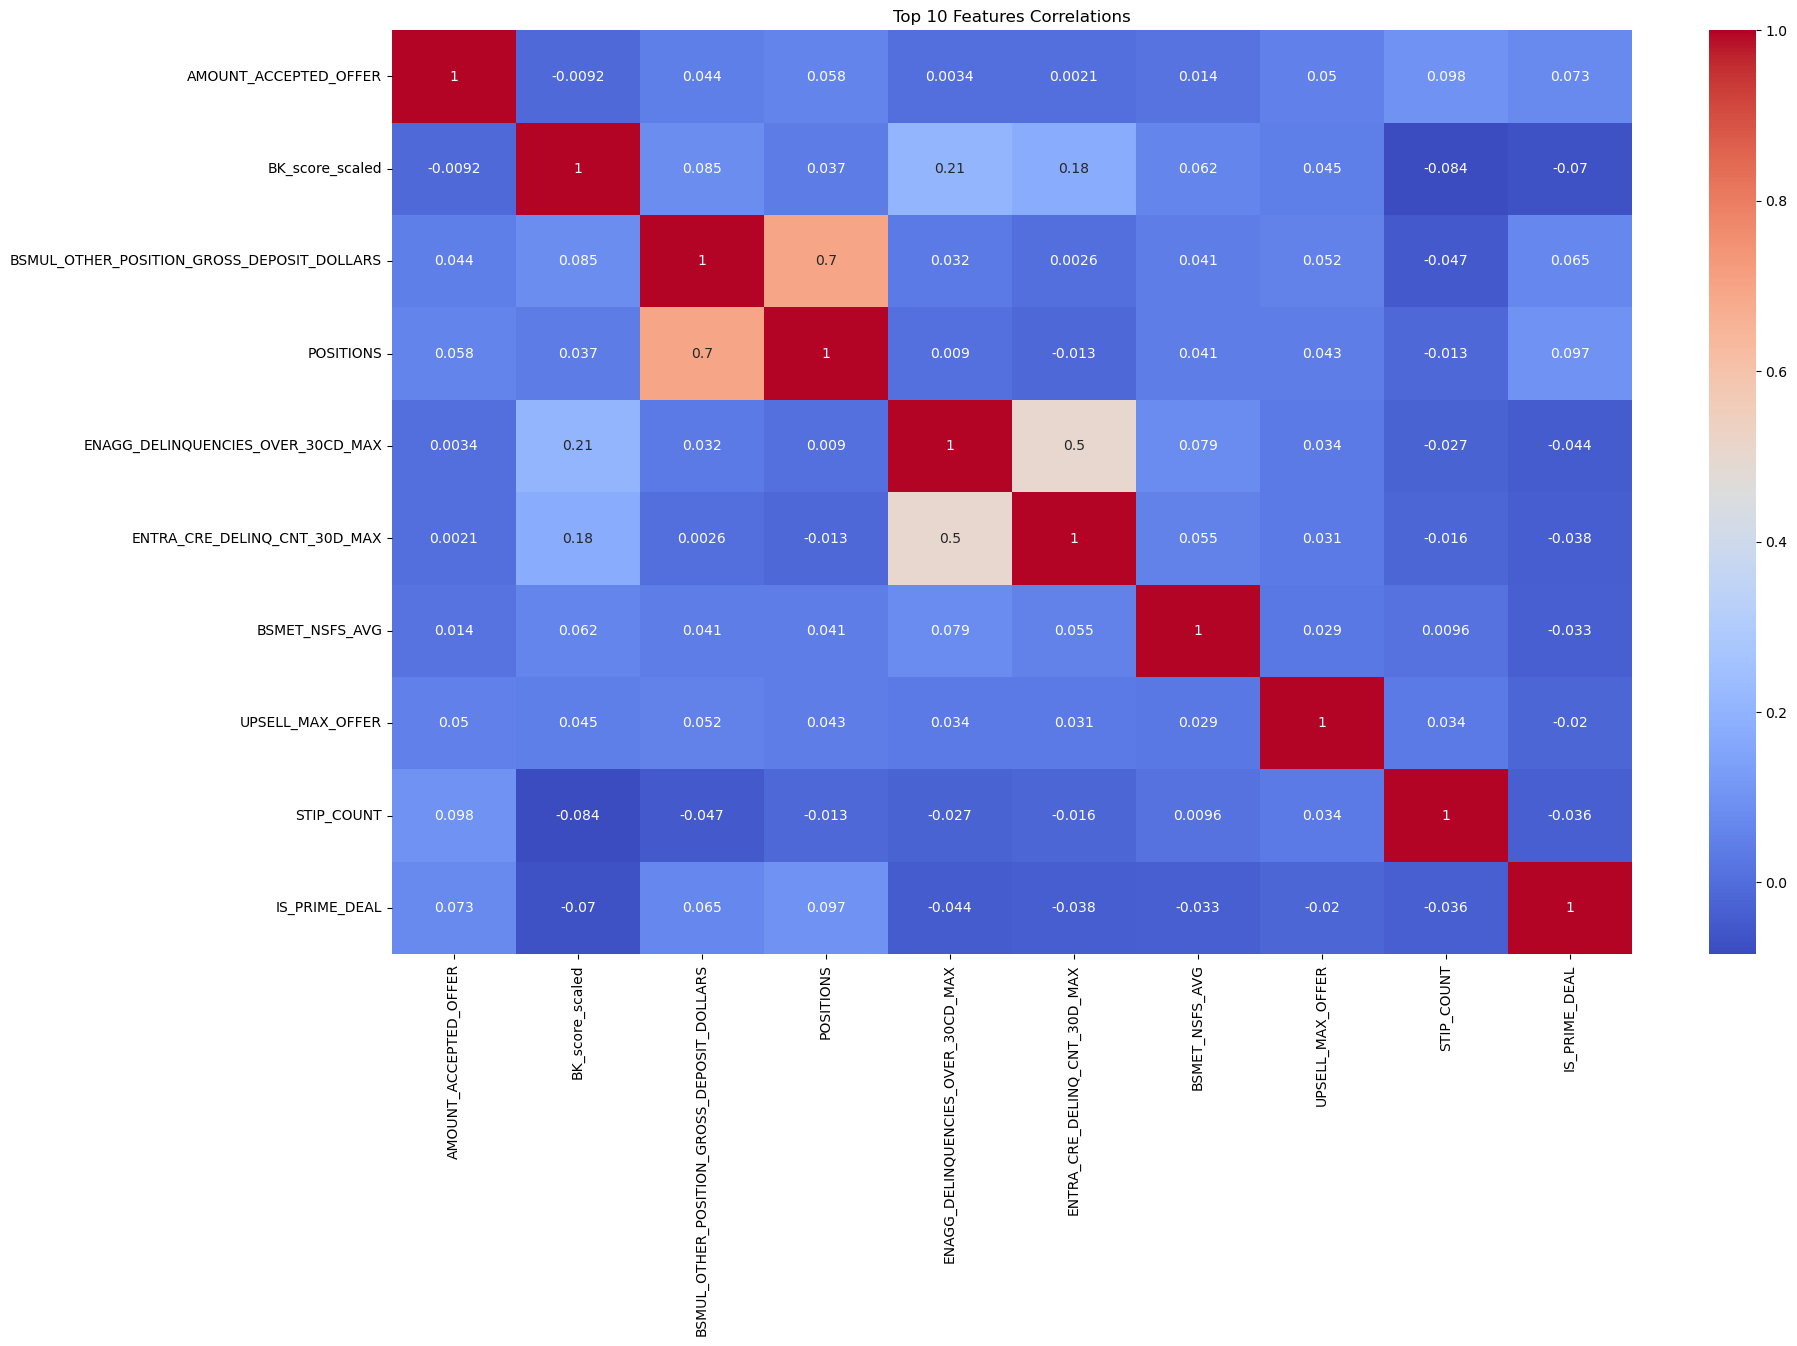

In [40]:
# sns.heatmap(customer_df.corr(), annot=True, cmap='coolwarm')

plt.figure(figsize=(20,12))
sns.heatmap(customer_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 Features Correlations")
plt.show()

# RandomForest to find predictive signals:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = customer_df.drop('STAGE_NAME', axis=1).select_dtypes(include=[float, int])
y = customer_df['STAGE_NAME']

model = RandomForestClassifier()
model.fit(X, y)

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# turn it back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

X = customer_df[['AMOUNT_ACCEPTED_OFFER', 'ENSCO_SCORE_BANKRUPTCY_MAX',
       'BSMUL_OTHER_POSITION_GROSS_DEPOSIT_DOLLARS', 'POSITIONS',
       'ENAGG_DELINQUENCIES_OVER_30CD_MAX', 'ENTRA_CRE_DELINQ_CNT_30D_MAX',
       'BSMET_NSFS_AVG', 'UPSELL_MAX_OFFER', 'STIP_COUNT']]
y = customer_df['STAGE_NAME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Using SHAP to understanding outputs

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Train_Test_Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = customer_df.drop('STAGE_NAME', axis=1)
y = customer_df['STAGE_NAME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [44]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
log_y_pred = log_model.predict(X_test)
log_y_proba = log_model.predict_proba(X_test)[:, 1]

In [46]:
print(confusion_matrix(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, log_y_proba))

[[43914   758]
 [ 3253   723]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     44672
           1       0.49      0.18      0.26      3976

    accuracy                           0.92     48648
   macro avg       0.71      0.58      0.61     48648
weighted avg       0.89      0.92      0.90     48648

ROC AUC Score: 0.9172466580013752


# Using XGBoost

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [48]:
xgb_model = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/Users/alexlei/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:58:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [50]:
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_y_proba))

[[42975  1697]
 [ 1054  2922]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     44672
           1       0.63      0.73      0.68      3976

    accuracy                           0.94     48648
   macro avg       0.80      0.85      0.82     48648
weighted avg       0.95      0.94      0.95     48648

ROC AUC Score: 0.9754977331079961


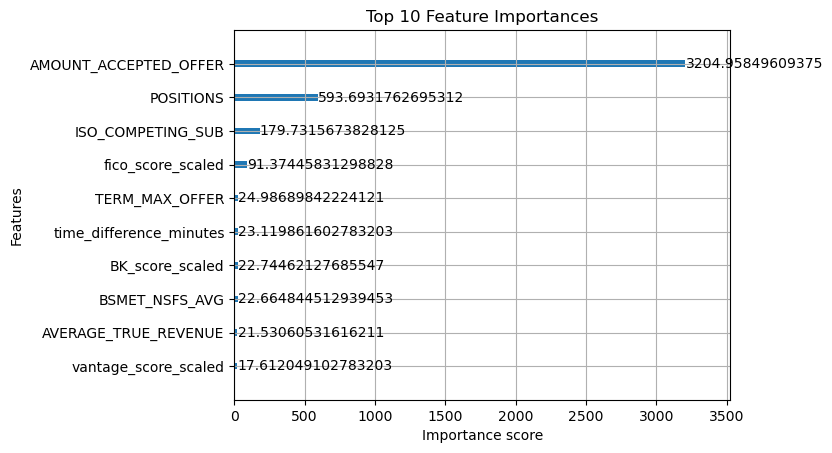

In [51]:
# check feature importance
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.show()

### Assuming AMOUNT_ACCEPTED_OFFER can be ignored since it's only relevant if the deal is Funded
### POSITIONS column (which is the exisiting financing counts) seems to be the most important feature here

In [ ]:
# using SHAP to explain predictions

xgb_explainer = shap.Explainer(xgb_model, X_train)
xgb_shap_values = explainer(X_test)

shap.summary_plot(xgb_shap_values, X_test)
shap.plots.force(shap_values[0])